In [1]:
# import various packages
import numpy as np
import pandas as pd
import pickle  # нужно для записи данных при расчёте порохов
from OZVB_DU import *
import matplotlib.pyplot as plt
from matplotlib.pylab import figure
%config InlineBackend.figure_format = 'svg'
rc = {'font.family': 'serif',
      'font.serif': 'Times New Roman',
      'font.variant': 'normal',
      'font.weight':  'normal',
      'font.stretch': 'normal',
      'font.style': 'normal',
      'font.size':    12.0,
      'mathtext.default': 'regular',
      'mathtext.fontset': 'stix'}
plt.rcParams.update(rc)

In [2]:
# Тестовая задача (звездообразный заряд)
INIT_4 = {'kappa_0': 120, 'l_gr': 1.2198, 'shape': 'star', 'r_': 0.12, 'alpha_1': 1.405, 'tetta': np.radians(32), 'R': 0.05,
          'r': 6*1e-3, 'z_1': 0.0166, 'z_2': 0.04, 'z_3': 0.0474, 'ro_t': 1770, 'omega_opt': [50], 'count': 8,
          'D_ks': 0.192, 'D_kr_opt': [0.060], 'e_d_opt': [0.417], 'z_0': 0.04, 'epsilon_f': 0.8, 'epsilon_w': 0.8,
          'p_ref_t': 98066.5, 'p_h': 0.1, 'T_deg': [273.15-50, 273.15+20, 273.15+50], 'T_s': 750, 'T_ref': 273.15+20,
          'c_p_nach': 1004.5, 'R_nach': 287, 'p_ref_v': 1e6, 'ro_v': 1850, 'u_1_v': 16.9, 'nu_v': 0.22, 'D_t_v': 0.0028, 'T_p_v': 2543.3,
          'mu_g_v': 0.6193*1e-4, 'lamda_g_v': 0.0871, 'c_p_v': 1311.4, 'c_p_g_v': 896.32, 'z_0_v': 0.55634, 'R_g_v': 317.47,
          'T_p_1': 3415, 'n_t': 1.1493, 'n_kr': 1.1305, 'u_1_t': 2.9, 'nu_t': 0.3, 'D_t_t': 0.002, 'c_p_1': 2070.7,
          'c_t': 1377, 'lamda_t': 0.24, 'kappa_ref': 100, 'z_0_t': 0.31699, 'R_t': 441.74, 'e_v_0':0.75, 'm_v':0.125}

res_4 = get_p_graph(INIT_4).get_result(s_df=1)


Количество зёрен: 5877.0 

Начальные условия для первого этапа (T_0 = 223.15 K):
[1.00000000e+05 2.23150000e+02 8.92116842e-03 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Начальные условия для второго этапа (T_0 = 223.15 K):
[5.75999447e+06 3.41475484e+03 1.03334340e-02 2.07070000e+03
 3.01712837e+02 7.50471165e-04 1.98317331e-03 2.77641644e+05]
Начальные условия для первого этапа (T_0 = 293.15 K):
[1.00000000e+05 2.93150000e+02 8.92116842e-03 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Начальные условия для второго этапа (T_0 = 293.15 K):
[6.99693678e+06 3.41475678e+03 1.07138105e-02 2.07070000e+03
 3.01712837e+02 7.50033696e-04 2.54820579e-03 2.08960466e+05]
Начальные условия для первого этапа (T_0 = 323.15 K):
[1.00000000e+05 3.23150000e+02 8.92116842e-03 1.00450000e+03
 2.87000000e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00]
Начальные условия для второго этапа (T_0 = 323.15 K):
[7.60433554e+06 3.41473127e+03 1.

,"t, с","p, МПа","T, К"
1,0.025,0.934,2206.910
2,0.042,6.846,3380.163
3,4.745,6.520,3416.157
4,5.935,0.171,3365.060


,"t, с","p, МПа","T, К"
1,0.012,1.227,2246.968
2,0.028,8.820,3348.286
3,3.875,7.946,3416.406
4,4.885,0.171,3347.451


,"t, с","p, МПа","T, К"
1,0.009,1.245,2255.952
2,0.025,9.633,3346.827
3,3.555,8.649,3416.528
4,4.495,0.170,3337.841


D_ks: 192.0
D_kr: 60.0
m_v: 0.125
m_t: 50
e_t_0: 40.0
n: 8
tetta: 32.0
r: 6.0
e_v_0: 0.75
d_1: 3.75
c_1: 0.5625000000000001
T_s: 750
p_h: 100000.0


5946743.938438035
1.1511812985273513


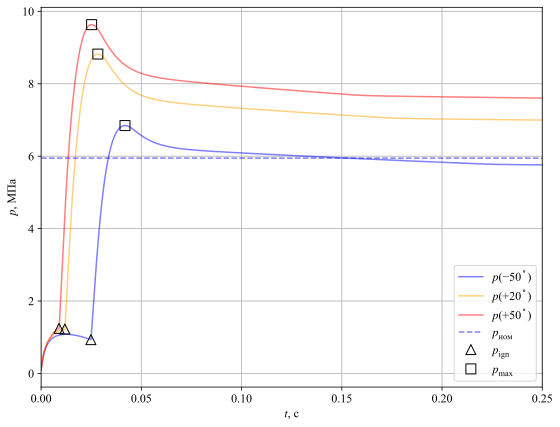

In [3]:
ind = 0
for i in range(len(res_4[1][0]['RESULT_1']['e_topl'])):
    if res_4[1][0]['RESULT_1']['e_topl'][i] != 0:
        ind = i
        break
p_nom_1 = sum(res_4[1][0]['RESULT_1']['p_kam'][ind:])/len(res_4[1][0]['RESULT_1']['p_kam'][ind:])
print(p_nom_1)
print(max(res_4[1][0]['RESULT_1']['p_kam'])/p_nom_1)

fig = plt.figure(figsize=[9, 7])
fig.patch.set_facecolor('white')
plt.plot(res_4[1][0]['RESULT_1']['t_kam'][:-1], res_4[1][0]['RESULT_1']['p_kam'][:-1]/1e6,
         color='b', label='$\mathit{p}(-50^\circ)$', alpha=0.5)
plt.plot(res_4[1][1]['RESULT_1']['t_kam'][:-1], res_4[1][1]['RESULT_1']['p_kam'][:-1]/1e6,
         color='orange', label='$\mathit{p}(+20^\circ)$', alpha=0.5)
plt.plot(res_4[1][2]['RESULT_1']['t_kam'][:-1], res_4[1][2]['RESULT_1']['p_kam'][:-1]/1e6,
         color='r', label='$\mathit{p}(+50^\circ)$', alpha=0.5)
plt.plot([0, 0.25], [p_nom_1/1e6, p_nom_1/1e6],
         color='b', label='$\mathit{p}_{ном}$', ls='--', alpha=0.5)
plt.xlim(0,0.25)

# Конец горения воспламенителя
p_m50_1 = res_4[1][0]['RESULT_1']['p_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
p_20_1 = res_4[1][1]['RESULT_1']['p_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
p_50_1 = res_4[1][2]['RESULT_1']['p_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
t_m50_1 =res_4[1][0]['RESULT_1']['t_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
t_20_1 = res_4[1][1]['RESULT_1']['t_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
t_50_1 = res_4[1][2]['RESULT_1']['t_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
T_m50_1 =res_4[1][0]['RESULT_1']['T_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
T_20_1 = res_4[1][1]['RESULT_1']['T_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
T_50_1 = res_4[1][2]['RESULT_1']['T_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
p_1 = np.array([p_m50_1, p_20_1, p_50_1])
t_1 = np.array([t_m50_1, t_20_1, t_50_1])
plt.plot(t_1, p_1/1e6, marker='^', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{ign}$')

# Максимальное значение давления
p_m50_2 = res_4[1][0]['RESULT_1']['p_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
p_20_2 = res_4[1][1]['RESULT_1']['p_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
p_50_2 = res_4[1][2]['RESULT_1']['p_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
t_m50_2 =res_4[1][0]['RESULT_1']['t_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
t_20_2 = res_4[1][1]['RESULT_1']['t_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
t_50_2 = res_4[1][2]['RESULT_1']['t_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
T_m50_2 =res_4[1][0]['RESULT_1']['T_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
T_20_2 = res_4[1][1]['RESULT_1']['T_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
T_50_2 = res_4[1][2]['RESULT_1']['T_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
p_2 = np.array([p_m50_2, p_20_2, p_50_2])
t_2 = np.array([t_m50_2, t_20_2, t_50_2])
plt.plot(t_2, p_2/1e6, marker='s', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{max}$')

plt.xlabel('$\mathit{t}$, с')
plt.ylabel('$\mathit{p}$, МПа')
plt.legend()
plt.grid()
plt.savefig(f'p(0...0.25).png',dpi=300, bbox_inches='tight')
plt.show()

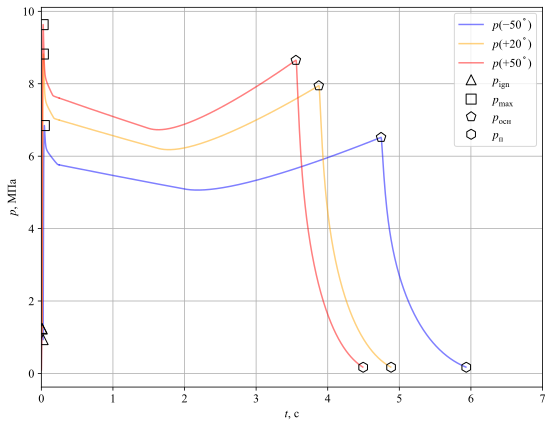

In [4]:
fig = plt.figure(figsize=[9, 7])
fig.patch.set_facecolor('white')
plt.plot(res_4[1][0]['RESULT_1']['t_kam'][:-1], res_4[1][0]['RESULT_1']['p_kam'][:-1]/1e6,
         color='b', label='$\mathit{p}(-50^\circ)$', alpha=0.5)
plt.plot(res_4[1][0]['RESULT_2']['t_kam'][:-1], res_4[1][0]['RESULT_2']['p_kam'][:-1]/1e6,
         color='b', alpha=0.5)
plt.plot(res_4[1][1]['RESULT_1']['t_kam'][:-1], res_4[1][1]['RESULT_1']['p_kam'][:-1]/1e6,
         color='orange', label='$\mathit{p}(+20^\circ)$', alpha=0.5)
plt.plot(res_4[1][1]['RESULT_2']['t_kam'][:-1], res_4[1][1]['RESULT_2']['p_kam'][:-1]/1e6,
         color='orange', alpha=0.5)
plt.plot(res_4[1][2]['RESULT_1']['t_kam'][:-1], res_4[1][2]['RESULT_1']['p_kam'][:-1]/1e6,
         color='r', label='$\mathit{p}(+50^\circ)$', alpha=0.5)
plt.plot(res_4[1][2]['RESULT_2']['t_kam'][:-1], res_4[1][2]['RESULT_2']['p_kam'][:-1]/1e6,
         color='r', alpha=0.5)
plt.xlabel('$\mathit{t}$, с')
plt.ylabel('$\mathit{p}$, МПа')

# Конец горения воспламенителя
p_m50_1 = res_4[1][0]['RESULT_1']['p_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
p_20_1 = res_4[1][1]['RESULT_1']['p_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
p_50_1 = res_4[1][2]['RESULT_1']['p_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
t_m50_1 =res_4[1][0]['RESULT_1']['t_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
t_20_1 = res_4[1][1]['RESULT_1']['t_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
t_50_1 = res_4[1][2]['RESULT_1']['t_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
T_m50_1 =res_4[1][0]['RESULT_1']['T_kam'][res_4[1][0]['RESULT_1']['e_topl']==0][-1]
T_20_1 = res_4[1][1]['RESULT_1']['T_kam'][res_4[1][1]['RESULT_1']['e_topl']==0][-1]
T_50_1 = res_4[1][2]['RESULT_1']['T_kam'][res_4[1][2]['RESULT_1']['e_topl']==0][-1]
p_1 = np.array([p_m50_1, p_20_1, p_50_1])
t_1 = np.array([t_m50_1, t_20_1, t_50_1])
plt.plot(t_1, p_1/1e6, marker='^', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{ign}$')

# Максимальное значение давления
p_m50_2 = res_4[1][0]['RESULT_1']['p_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
p_20_2 = res_4[1][1]['RESULT_1']['p_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
p_50_2 = res_4[1][2]['RESULT_1']['p_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
t_m50_2 =res_4[1][0]['RESULT_1']['t_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
t_20_2 = res_4[1][1]['RESULT_1']['t_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
t_50_2 = res_4[1][2]['RESULT_1']['t_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
T_m50_2 =res_4[1][0]['RESULT_1']['T_kam'][res_4[1][0]['RESULT_1']['p_kam']==max(res_4[1][0]['RESULT_1']['p_kam'])][-1]
T_20_2 = res_4[1][1]['RESULT_1']['T_kam'][res_4[1][1]['RESULT_1']['p_kam']==max(res_4[1][1]['RESULT_1']['p_kam'])][-1]
T_50_2 = res_4[1][2]['RESULT_1']['T_kam'][res_4[1][2]['RESULT_1']['p_kam']==max(res_4[1][2]['RESULT_1']['p_kam'])][-1]
p_2 = np.array([p_m50_2, p_20_2, p_50_2])
t_2 = np.array([t_m50_2, t_20_2, t_50_2])
plt.plot(t_2, p_2/1e6, marker='s', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{max}$')


# Конец горения основного заряда
p_m50_3 =res_4[1][0]['RESULT_2']['p_kam'][res_4[1][0]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
p_20_3 = res_4[1][1]['RESULT_2']['p_kam'][res_4[1][1]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
p_50_3 = res_4[1][2]['RESULT_2']['p_kam'][res_4[1][2]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
t_m50_3 =res_4[1][0]['RESULT_2']['t_kam'][res_4[1][0]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
t_20_3 = res_4[1][1]['RESULT_2']['t_kam'][res_4[1][1]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
t_50_3 = res_4[1][2]['RESULT_2']['t_kam'][res_4[1][2]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
T_m50_3 =res_4[1][0]['RESULT_2']['T_kam'][res_4[1][0]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
T_20_3 = res_4[1][1]['RESULT_2']['T_kam'][res_4[1][1]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
T_50_3 = res_4[1][2]['RESULT_2']['T_kam'][res_4[1][2]['RESULT_2']['e_topl']<=INIT_4['z_0']][-1]
p_3 = np.array([p_m50_3, p_20_3, p_50_3])
t_3 = np.array([t_m50_3, t_20_3, t_50_3])
plt.plot(t_3, p_3/1e6, marker='p', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{осн}$')


# Конец интегрирования
p_m50_4 =res_4[1][0]['RESULT_2']['p_kam'][res_4[1][0]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
p_20_4 = res_4[1][1]['RESULT_2']['p_kam'][res_4[1][1]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
p_50_4 = res_4[1][2]['RESULT_2']['p_kam'][res_4[1][2]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
t_m50_4 =res_4[1][0]['RESULT_2']['t_kam'][res_4[1][0]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
t_20_4 = res_4[1][1]['RESULT_2']['t_kam'][res_4[1][1]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
t_50_4 = res_4[1][2]['RESULT_2']['t_kam'][res_4[1][2]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
T_m50_4 =res_4[1][0]['RESULT_2']['T_kam'][res_4[1][0]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
T_20_4 = res_4[1][1]['RESULT_2']['T_kam'][res_4[1][1]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
T_50_4 = res_4[1][2]['RESULT_2']['T_kam'][res_4[1][2]['RESULT_2']['e_topl']>=INIT_4['z_0']][-1]
p_4 = np.array([p_m50_4, p_20_4, p_50_4])
t_4 = np.array([t_m50_4, t_20_4, t_50_4])
plt.plot(t_4, p_4/1e6, marker='h', markersize=10, linestyle='None',
         color='none',markeredgecolor='black', label='$\mathit{p}_{п}$')


plt.legend()
plt.grid()
plt.xlim(0, 7)
plt.savefig(f'p(t).png',dpi=300, bbox_inches='tight')
plt.show()